# Advances in Data Sciences and Architecture
## Assignment 1 – ML Models

### Name - Abhishek Gargaha Maheshwarappa
### Nuid - 001375462


## Abstract

Abalones also called ear-shells or sea ears, are sea snails (marine gastropod mollusks) found world-wide,shell fish which is rich in Vitamin E,Vitamin B12 and Iron. The age of an abalone can be determined by counting the number of shell layers that is rings present. However, this process is cumbersome and involves cutting a sample of the shell, staining it, and counting the number of rings through a microscope.The aim of the Notebook is predict the age of the Abalone using its physical characteristics. The age is (number of rings + 1.5) years.

## The Data Set
The data set provides 8 physical characteristics of abalones (sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight) and the number of shell rings. The age of the abalone is (number of rings + 1.5) years. The number of rings vary from 1 to 29.There are a total of 4177 samples.The target variable is the rings. 

In [2]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Reading the ablone data
data = pd.read_csv("abalone.csv")

 ![title](abalone.jpg) 

In [4]:
#Seeing the data in the file 
data.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [5]:
#Creating dummy variables for the sex 


data['Male'] = data.Sex.map({'F':0, 'M':1,'I':0})
data['Female'] = data.Sex.map({'F':1, 'M':0,'I':0})
data['Infant'] = data.Sex.map({'F':0, 'M':0,'I':1})


# Normalizing the data in the rings column beacuse the value is too high when compared to independent variable

from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = data[['Rings']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['Rings']] = pd.DataFrame(x_scaled)



In [6]:
#looking at data head after adding dummy variables and nromalizing
data.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.500000,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.214286,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.285714,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.321429,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.214286,0,0,1
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.250000,0,0,1
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,0.678571,0,1,0
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,0.535714,0,1,0
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,0.285714,1,0,0
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,0.642857,0,1,0


In [7]:
#now dropping the sex since we added the dummy variables 
data = data.drop('Sex', axis = 1)

#finding the correlation between all the features in the data
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,Infant
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.236543,0.309666,-0.551465
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.240376,0.318626,-0.564315
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.215459,0.298421,-0.518552
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.252038,0.299741,-0.557592
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.251793,0.263991,-0.521842
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.242194,0.308444,-0.556081
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.235391,0.306319,-0.546953
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.181831,0.250279,-0.436063
Male,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,1.000000,-0.512528,-0.522541
Female,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,-0.512528,1.000000,-0.464298


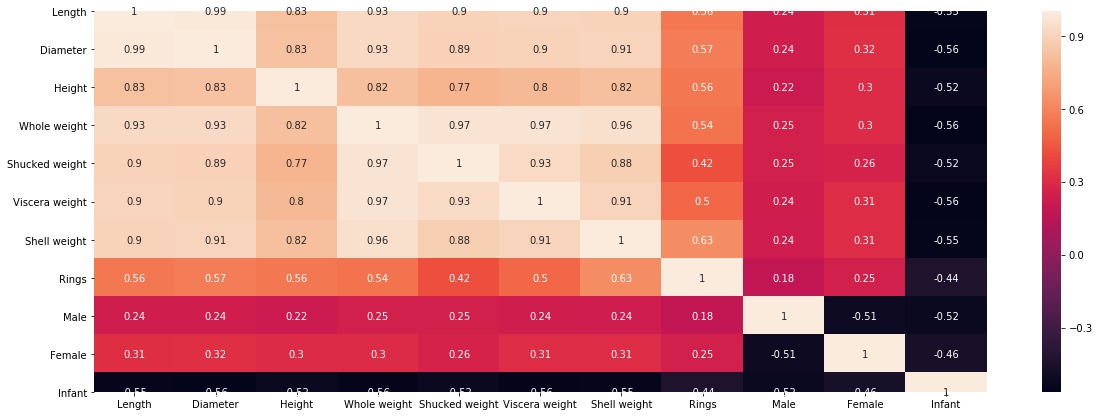

In [8]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [9]:
#The column names 
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Male', 'Female', 'Infant'],
      dtype='object')

In [10]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(data['Rings'], data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Male', 'Female', 'Infant']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.639e+32
Date:                Sun, 26 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:40:50   Log-Likelihood:             1.4709e+05
No. Observations:                4177   AIC:                        -2.942e+05
Df Residuals:                    4166   BIC:                        -2.941e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length          4.302e-16   1.02e-16      4.230      0.000    2.31e-16     6.3e-16
Diameter        1.943e-16   1.26e-16      1.547      0.122   -5.19e-17     4.4e-16
Height         -1.242e-15   8.69e-17    -14.298      0.000   -1.41e-15   -1.07e-15
Whole weight    -2.22e-16   4.15e-17     -5.348      0.000   -3.03e-16   -1.41e-16
Shucked weight  8.327e-17   4.91e-17      1.697      0.090   -1.29e-17    1.79e-16
Viscera weight  6.939e-16   7.33e-17      9.465      0.000     5.5e-16    8.38e-16
Shell weight   -1.249e-16   6.37e-17     -1.961      0.050    -2.5e-16   -4.17e-20
Rings              1.0000   2.44e-17    4.1e+16      0.000       1.000       1.000
Male            1.318e-16   1.62e-17      8.129      0.000       1e-16    1.64e-16
Female           4.51e-17   1.66e-17      2.720      0.007    1.26e-17    7.76e-17
Infant          3.209e-17   1.51e-17      2.124      0.034    2.47e-18    6.17e-17
==============================================================================
Omnibus:                     3198.465   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385630.671
Skew:                           2.882   Prob(JB):                         0.00
Kurtosis:                      49.717   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considering the significance value of 0.05.

1. The **length** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
2. The **Diameter** has the p-value 0.122, which is greater and this provides less evidence against the null hypothesis and it    is not a significant feature.
3. The **Height** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
4. The **Whole weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it    is a significant feature.
5. The **Shucked weight** has the p-value 0.090, which is greater and this provides less evidence against the null hypothesis      and it is not a significant feature.
6. The **Viscera weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and      it is a significant feature.
7. The **Shell weight** has the p-value 0.05 , which is equal and this provides evidence against the null hypothesis and it is    a significant feature.
8. The **Male** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a        significant feature.
9. The **Female** has the p-value 0.007, which is less and this provides greater evidence against the null hypothesis and it is    a significant feature.
10. The **Infant** has the p-value 0.034, which is less and this provides greater evidence against the null hypothesis and it       is a significant feature.


In [11]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Male,Female,Infant
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.236543,0.309666,-0.551465
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.240376,0.318626,-0.564315
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.215459,0.298421,-0.518552
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.252038,0.299741,-0.557592
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.251793,0.263991,-0.521842
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.242194,0.308444,-0.556081
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.235391,0.306319,-0.546953
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.181831,0.250279,-0.436063
Male,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831,1.000000,-0.512528,-0.522541
Female,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,-0.512528,1.000000,-0.464298


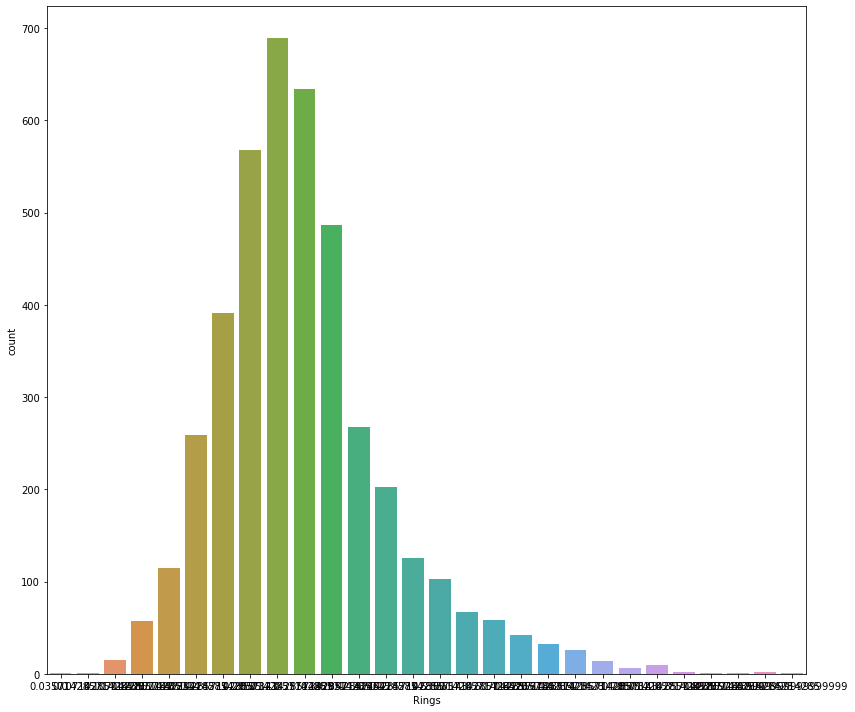

In [12]:
#  Our job is to predict the age of the Ring on the given feature. So, let look at the Ring in detail.

plt.figure(figsize=(12, 10))

sns.countplot(data.Rings)

plt.tight_layout()


<Figure size 864x720 with 0 Axes>

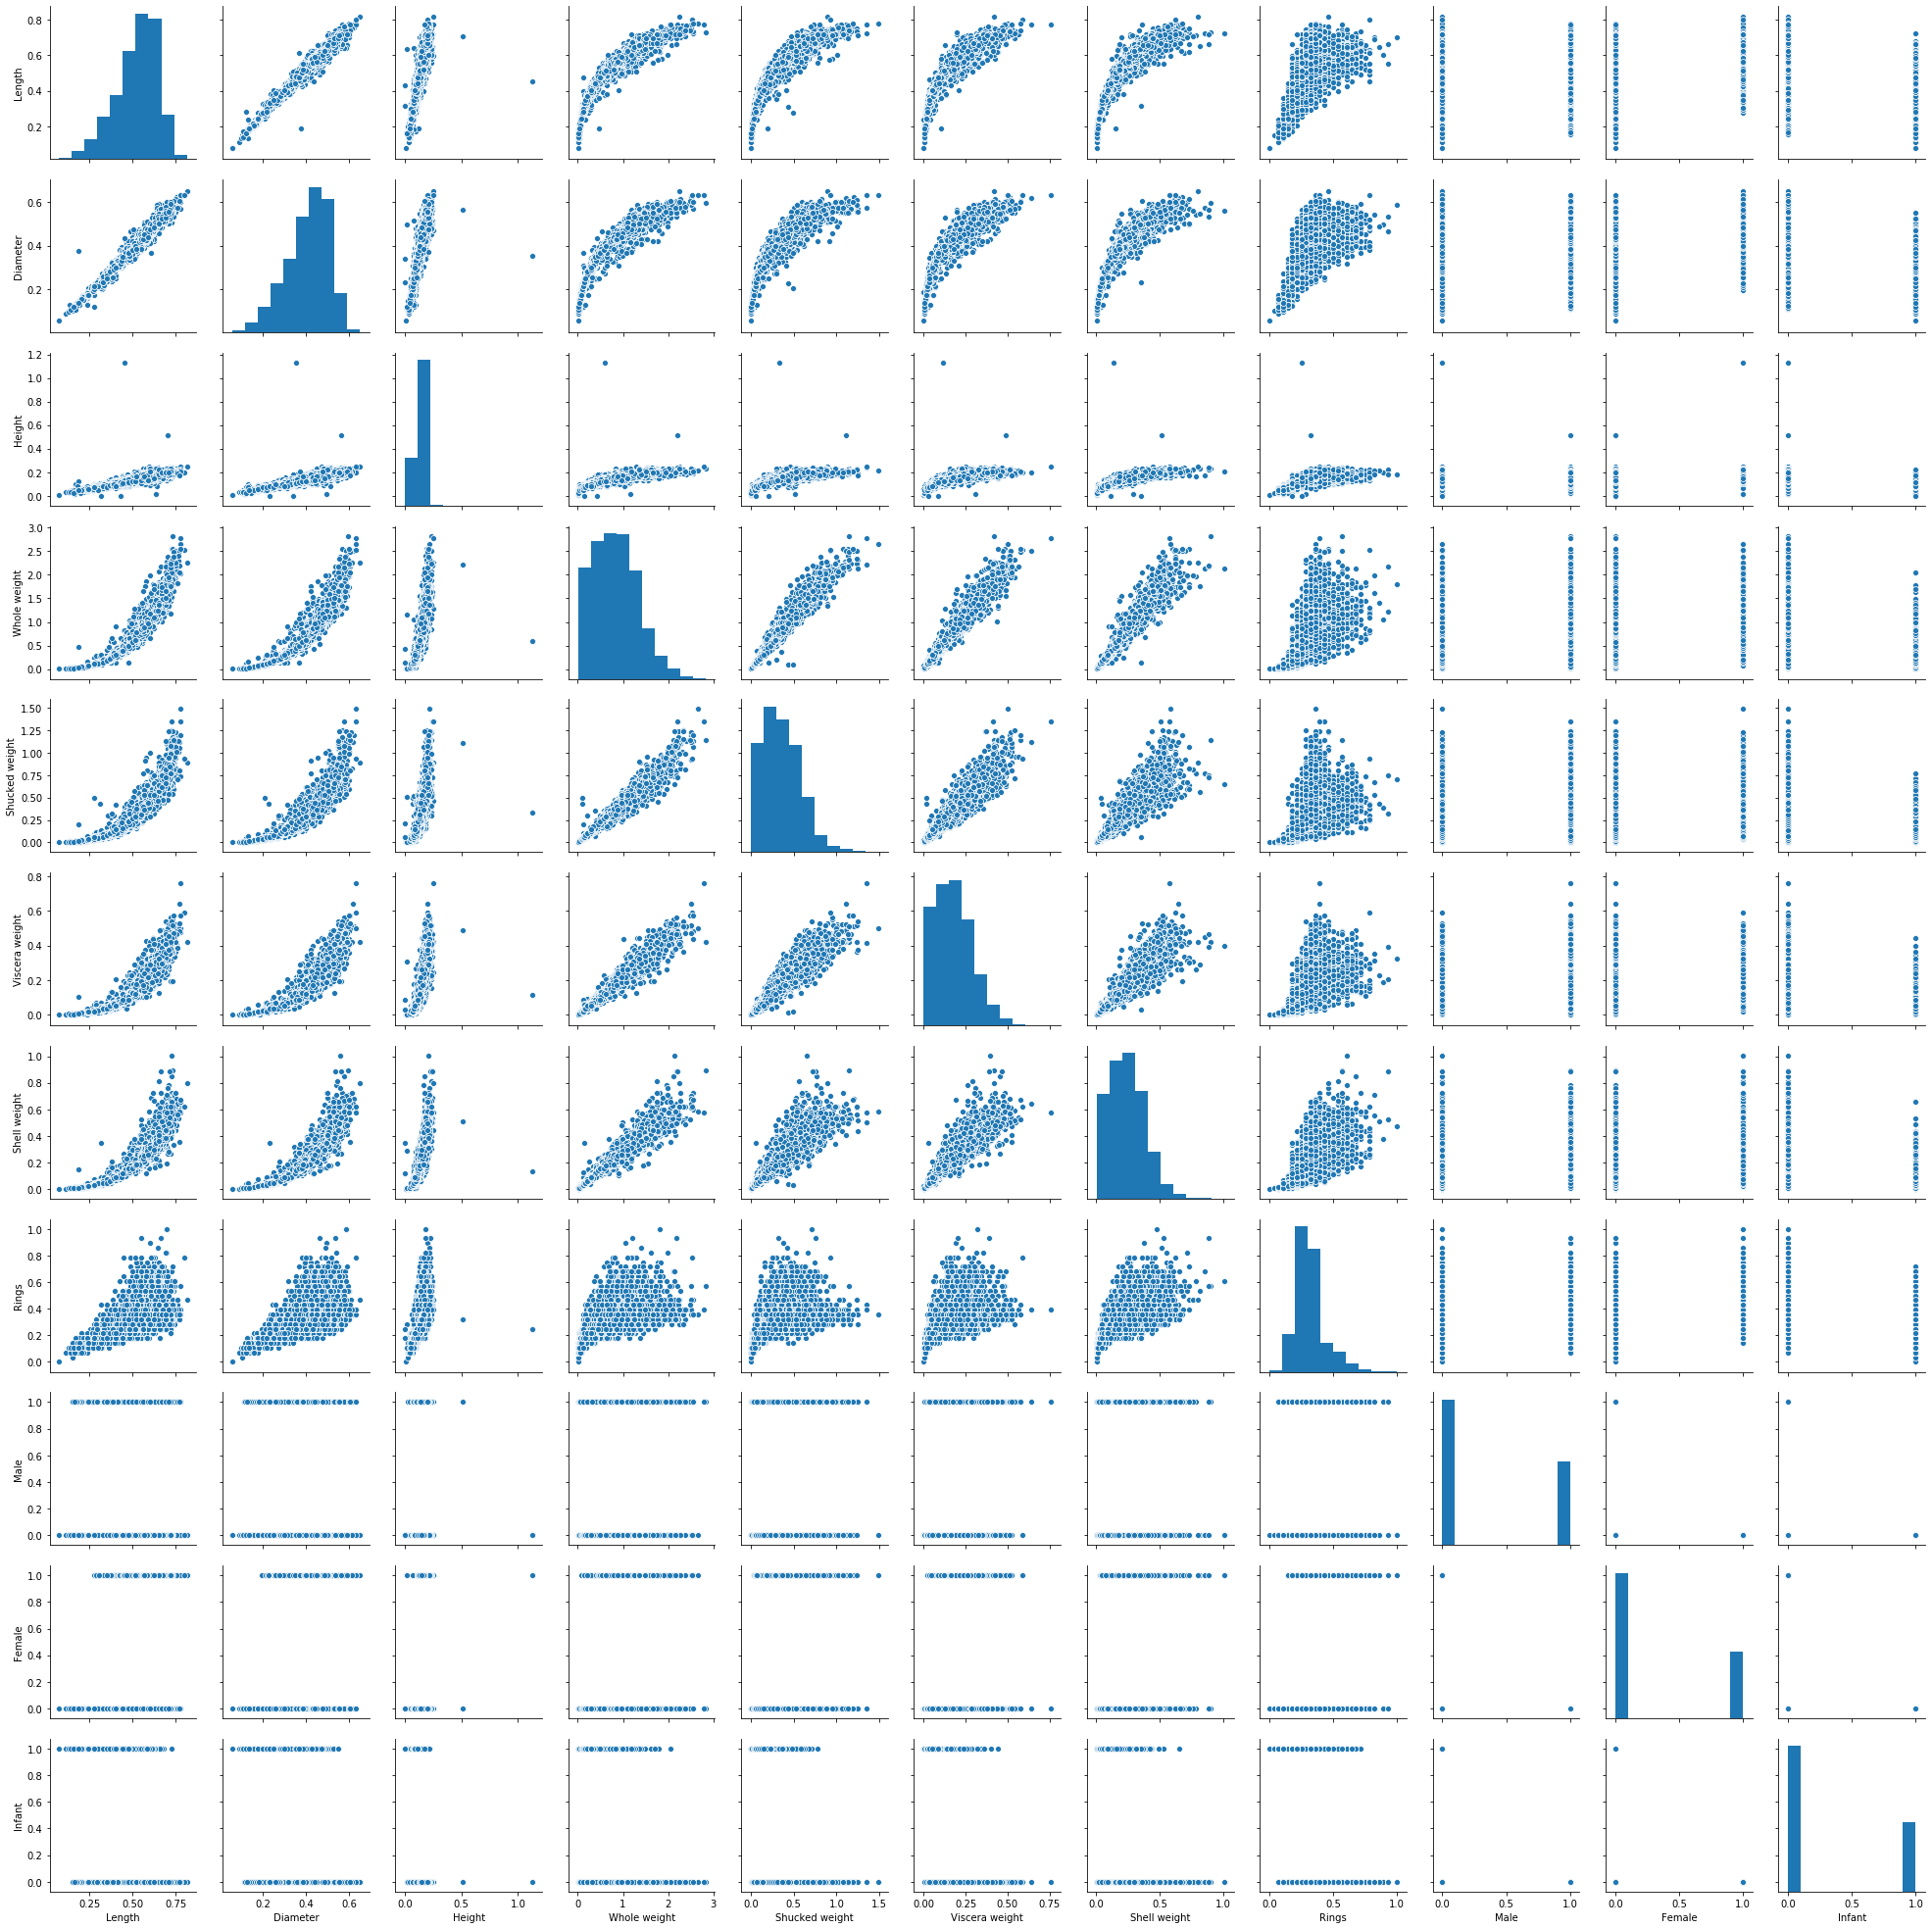

In [13]:
#pair plot
plt.figure(figsize=(12,10))
sns.pairplot(data) 

## Is there any multi-collinearity in the model? 

Yes there is a multi - collinearity between many independent variables, this can be confirmed from the Coorelation heat map and table above.

# Train ,Validation and Test split

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [14]:
from sklearn.model_selection import  train_test_split

X = data[ ['Length', 'Height', 'Whole weight','Viscera weight', 'Shell weight', 'Male', 'Female', 'Infant']]

y = data['Rings']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

# Linear Regression

In [15]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [17]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))


Coefficients: 
 [ 0.1626664   0.38994384 -0.19995311 -0.08819077  0.96568127  0.01028959
  0.01411358 -0.02440317]
Mean squared error: 0.01
Coefficient of determination: 0.47


In [18]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))


Coefficients: 
 [ 0.1626664   0.38994384 -0.19995311 -0.08819077  0.96568127  0.01028959
  0.01411358 -0.02440317]
Mean squared error: 0.01
Coefficient of determination: 0.47


# Polynomial Features

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6) 


X_poly = poly.fit_transform(X_train)

In [40]:
model = LinearRegression()
model.fit(X_poly, y_train)

y_train_pred = model.predict(X_poly)

X_val_poly = poly.fit_transform(X_val)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

r2 = r2_score(y_train,y_train_pred)

print('Root mean square error score on training set = ',rmse)
print('R^2 score on tarining set =',r2)

Root mean square error score on training set =  0.05919968045267569
R^2 score on tarining set = 0.7355423540229964


In [39]:
y_val_pred = model.predict(X_val_poly)
rmse = np.sqrt(mean_squared_error(y_val,y_val_pred))
r2 = r2_score(y_val,y_val_pred)

print('Root mean square error score on training set = ',rmse)
print('R^2 score on tarining set =',r2)

Root mean square error score on training set =  5.31139677168699
R^2 score on tarining set = -1981.7155575883571


# Regularization

Since the model is fiting the tarining data but fails on the validation data it is overfitting the training data.
To counter this using regularization, two kinds of regularization
1. **Lasso**
2. **Ridge**

## Lasso Regularization

In [41]:
from sklearn.linear_model import Lasso

X_poly_train = poly.fit_transform(X_train)
reg = Lasso(alpha=0.5)
reg.fit(X_poly_train, y_train)


X_poly_val = poly.fit_transform(X_val)

y_train_pred = reg.predict(X_poly_train)
y_val_pred = reg.predict(X_poly_val)

print('Lasso Regression: root mean square error score on training set',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Lasso Regression: R^2 score on training set',r2_score(y_train,y_train_pred))

print('Lasso Regression: root mean square error score on validation  set',np.sqrt(mean_squared_error(y_val,y_val_pred)))
print('Lasso Regression: R^2 score on validation set',r2_score(y_val,y_val_pred))


Lasso Regression: root mean square error score on training set 0.11501507973622785
Lasso Regression: R^2 score on training set 0.0017783783624532035
Lasso Regression: root mean square error score on validation  set 0.11968229181328863
Lasso Regression: R^2 score on validation set -0.006706140698264695


## Ridge Regularization

In [42]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.01)


from sklearn.linear_model import Lasso

X_poly_train = poly.fit_transform(X_train)
#reg = Lasso(alpha=0.5)
reg.fit(X_poly_train, y_train)

X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

y_train_pred = reg.predict(X_poly_train)
y_val_pred = reg.predict(X_poly_val)

print('Ridge Regression: root mean square error score on training set',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Ridge Regression: R^2 score on training set',r2_score(y_train,y_train_pred))

print('Ridge Regression: root mean square error score on validation set',np.sqrt(mean_squared_error(y_val,y_val_pred)))
print('Ridge Regression: R^2 score on validation set',r2_score(y_val,y_val_pred))


Ridge Regression: root mean square error score on training set 0.07795885312056697
Ridge Regression: R^2 score on training set 0.5413849677641356
Ridge Regression: root mean square error score on validation set 0.08340181577131503
Ridge Regression: R^2 score on validation set 0.5111293825990346


Are any model assumptions violated?
The data is not completely linear and its little spread out.

Is there any multi-collinearity in the model?
Yes there is multi - collinearity with a lot of the features which is shown by the correlation table

In the multivariate models are predictor variables independent of all the other predictor variables?
No, not all the predictor variables independent

In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

1. The **length** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
2. The **Diameter** has the p-value 0.122, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
3. The **Height** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
4. The **Whole weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
5. The **Shucked weight** has the p-value 0.090, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
6. The **Viscera weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
7. The **Shell weight** has the p-value 0.05, which is equal and this provides evidence against the null hypothesis and it is a significant feature.
8. The **Male** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a        significant feature.
9. The **Female** has the p-value 0.007, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
10. The **Infant** has the p-value 0.034, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

Does the model make sense? 
Yes it does make sense, it gives low root mean square error score on validation set 0.08657425111314444'

Does regularization help?
Yes, regularization did help though lasso did perform well ridge did give better r2 score and root mean square error.

Which independent variables are significant?
1. length
2. Height
3. Whole weight
4. Viscera weight
5. Shell weight
6. Male
7. Female
8. Infant 

this all based on the p-value 


Which hyperparameters are important? 
1. The training and validation set to split.
2. The features which affect the target variable is the hyperparameter.
3. Alpha in the regularization 

# Descision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(splitter = 'random', max_leaf_nodes = 35, min_samples_leaf = 10, max_depth= 10)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=35,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='random')

In [27]:
r2 = r2_score(y_train, dtree.predict(X_train)) 
print("r2_score on the Training data",r2 )

0.4775347707348595

In [28]:
r2 = r2_score(y_val, dtree.predict(X_val))
print("r2_score on the Training data",r2 )

0.4213852828340885

In [29]:
dt_reg = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 0.2, random_state= 50)

#Fitting the tree to the training data

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

# Using Grid search for the tunning the hyper parameter

 ![title](tunning.jpeg) 

In [30]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
param_grid={'min_samples_split': range(2, 100),
            'ccp_alpha':(0.0,1,0.5,0.1),
            'max_depth':(10, 20, 30),},
              scoring=scoring, refit=True)

 

g_cv.fit(X_train, y_train)
print("The best parameters",g_cv.best_params_)


r2 = r2_score(y_train, g_cv.best_estimator_.predict(X_train))
print("r2_score on the Training data",r2 )
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,g_cv.best_estimator_.predict(X_train))))

r2_val=r2_score(y_val, g_cv.best_estimator_.predict(X_val))
print("r2_score on the Validation data",r2_val )
print('Root mean square error score on Validation set',np.sqrt(mean_squared_error(y_val,g_cv.best_estimator_.predict(X_val))))

The best parameters {'ccp_alpha': 0.0, 'max_depth': 20, 'min_samples_split': 82}
r2_score on the Training data 0.5759300724782224
Root mean square error score on training set 0.07496525741257207
r2_score on the Validation data 0.4480946753961952
Root mean square error score on Validation set 0.08861573217171027


Is there any multi-collinearity in the model?
Yes there is multi - collinearity with a lot of the features which is shown by the correlation table

In the multivariate models are predictor variables independent of all the other predictor variables?
No, not all the predictor variables independent

In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

1. The **length** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
2. The **Diameter** has the p-value 0.122, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
3. The **Height** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
4. The **Whole weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
5. The **Shucked weight** has the p-value 0.090, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
6. The **Viscera weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
7. The **Shell weight** has the p-value 0.05, which is equal and this provides evidence against the null hypothesis and it is a significant feature.
8. The **Male** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a        significant feature.
9. The **Female** has the p-value 0.007, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
10. The **Infant** has the p-value 0.034, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

Does the model make sense? 
Yes it does make sense, it gives low root mean square error score on validation set 0.08657425111314444'

Does regularization help?
Yes, regularization did help though lasso did perform well ridge did give better r2 score and root mean square error.

Which independent variables are significant?
1. length
2. Height
3. Whole weight
4. Viscera weight
5. Shell weight
6. Male
7. Female
8. Infant 

this all based on the p-value 


Which hyperparameters are important? 
1. 'min_samples_split'- min number of data points placed in a node before the node is split
2. 'ccp_alpha':learning parameter
3. 'max_depth':max number of levels in each decision tree

Used the Grid Search to tune the **Hyper Parameter** and found the best possible hyperparameter for the Decision Tree.

After hyperparameter tunning, the model did better performance.

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

0.6115086965787531

In [32]:

print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for validation data',r2_score(y_val, random_model.predict(X_val)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on validation set',np.sqrt(mean_squared_error(y_val,random_model.predict(X_val))))


R2 score for training data 0.6115086965787531
R2 score for validation data 0.5067813040732456
Root mean square error score on training set 0.0717516593688687
Root mean square error score on validation set 0.08377188799572027


# Random Hyperparameter Grid

Tunning the hyperparameter

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [35]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [36]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =200,
 min_samples_split = 5,
 min_samples_leaf = 4,
 max_features= 'auto',
 max_depth = 10,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

0.7296535285145198

In [37]:
print(r2_score(y_val, random_model.predict(X_val)))

rmse = np.sqrt(mean_squared_error(y_val,random_model.predict(X_val)))
print(rmse)

0.49418816150432743
0.08483460322840304


Is there any multi-collinearity in the model?
Yes there is multi - collinearity with a lot of the features which is shown by the correlation table

In the multivariate models are predictor variables independent of all the other predictor variables?
No, not all the predictor variables independent

In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

1. The **length** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
2. The **Diameter** has the p-value 0.122, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
3. The **Height** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a      significant feature.
4. The **Whole weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
5. The **Shucked weight** has the p-value 0.090, which is greater and this provides less evidence against the null hypothesis and it is not a significant feature.
6. The **Viscera weight** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
7. The **Shell weight** has the p-value 0.05, which is equal and this provides evidence against the null hypothesis and it is a significant feature.
8. The **Male** has the p-value 0, which is less and this provides greater evidence against the null hypothesis and it is a        significant feature.
9. The **Female** has the p-value 0.007, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.
10. The **Infant** has the p-value 0.034, which is less and this provides greater evidence against the null hypothesis and it is a significant feature.

Does the model make sense? 
Yes it does make sense, it gives low root mean square error score on validation set 0.08657425111314444'

Does regularization help?
Yes, regularization did help though lasso did perform well ridge did give better r2 score and root mean square error.

Which independent variables are significant?
1. length
2. Height
3. Whole weight
4. Viscera weight
5. Shell weight
6. Male
7. Female
8. Infant 

this all based on the p-value 


Which hyperparameters are important? 
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Used the Grid Search to tune the **Hyper Parameter** and found the best possible hyperparameter for the Random Hyperparameter Grid.

After hyperparameter tunning, the model did better performance.

### Test Set

In [38]:
X_poly_test = poly.fit_transform(X_test)
y_test_pred = reg.predict(X_poly_test)

print('R2 score for the Polynomial regression =',r2_score(y_test, y_test_pred))

print('R2 score for the Decision Tree  =',r2_score(y_test, g_cv.best_estimator_.predict(X_test)))

print('R2 score for Random forest =',r2_score(y_val, random_model.predict(X_val)))


R2 score for the Polynomial regression = 0.506372708312656
R2 score for the Decision Tree  = 0.36872783580437196
R2 score for Random forest = 0.49418816150432743


## Conclusion

After using different algorithms it can be concluded that Polynomial regression and Random forest has better R2 score and its the best way to get the rings of ablone, which help us to determine there age in years.

## The R2 Score on **Validation** data for different 


### Linear Regression


R2 = 0.45936233511378033


### Decision tree

R2 = 0.45715331487345023



### Random Forest

R2 = 0.4806190649568951


## The R2 Score on **Test** data for different 



### Linear Regression


R2 = 0.49912881056889724


### Decision tree

R2 =0.4130014542428416


### Random Forest

R2 = 0.4887215153256166

From the test data set, it is clear that the Polynomial regression of degree 6 is the best algorithms. 





### Refernces

1. Sckit learn offcial documentation
2. Machine Learning with scikit-learn Quick Start Guide - by Kevin Jolly
3. Refered Towards Data Science 

The algorithms were referred directly from the **Sckit learn official documentation**. Grid Search and the Randomized search for hyperparameter training referred to **towards dataScience**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide.  The reaming code was written independently.









Copyright 2020 Abhishek Garga Maheshwarappa


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.